In [8]:
# Check your Python version
!python --version

Python 3.7.4


In [9]:
"""
Code borrowed from: 
"https://github.com/MITESHPUTHRANNEU/Speech-Emotion-Analyzer"
"https://github.com/MITESHPUTHRANNEU/Speech-Emotion-Analyzer/blob/master/saved_models/Emotion_Voice_Detection_Model.h5"
"https://github.com/MITESHPUTHRANNEU/Speech-Emotion-Analyzer/blob/master/AudioRecorder.ipynb"
"""

# Record and save a 4s recording as a WAV file named "output10", in the same location as this notebook file

import pyaudio
import wave

CHUNK = 1024 
FORMAT = pyaudio.paInt16 #paInt8
CHANNELS = 2 
RATE = 44100 #sample rate
RECORD_SECONDS = 4
WAVE_OUTPUT_FILENAME = "output10.wav"

p = pyaudio.PyAudio()

stream = p.open(format=FORMAT,
                channels=CHANNELS,
                rate=RATE,
                input=True,
                frames_per_buffer=CHUNK) #buffer

print("* recording")

frames = []

for i in range(0, int(RATE / CHUNK * RECORD_SECONDS)):
    data = stream.read(CHUNK)
    frames.append(data) # 2 bytes(16 bits) per channel

print("* done recording")

stream.stop_stream()
stream.close()
p.terminate()

wf = wave.open(WAVE_OUTPUT_FILENAME, 'wb')
wf.setnchannels(CHANNELS)
wf.setsampwidth(p.get_sample_size(FORMAT))
wf.setframerate(RATE)
wf.writeframes(b''.join(frames))
wf.close()

* recording
* done recording


In [10]:
!pip install librosa --user

In [11]:
import librosa

In [12]:
from librosa.display import waveplot

In [13]:
import matplotlib.pyplot as plt

In [14]:
data, sampling_rate = librosa.load('output10.wav')

In [15]:
data

array([-0.00470597, -0.00701151, -0.00469061, ...,  0.0145565 ,
        0.0053546 , -0.01533937], dtype=float32)

In [16]:
sampling_rate

22050

In [17]:
import os
import pandas as pd
import librosa
import glob 

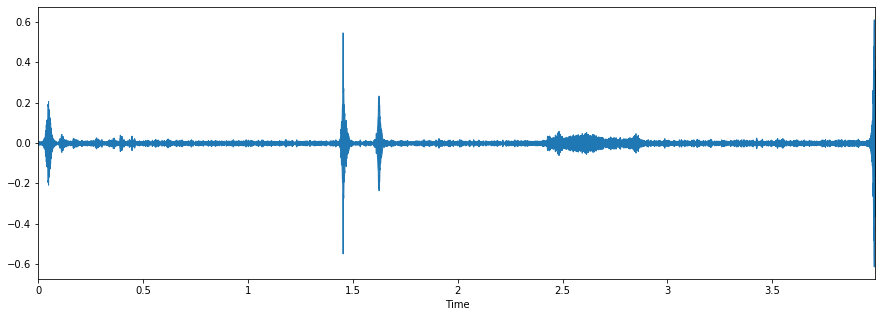

In [18]:
# Import our recording ("output10.wav") and plot the waveform


plt.figure(figsize=(15, 5))
waveplot(data, sr=sampling_rate)

In [19]:
# Extract audio features (MFCCs) into a Numpy array
import numpy as np

#livedf= pd.DataFrame(columns=['feature'])
X, sample_rate = librosa.load('output10.wav', res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)
sample_rate = np.array(sample_rate)
mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13),axis=0)
featurelive = mfccs
livedf2 = featurelive

In [20]:
# Transfer data from Numpy array to Pandas dataframe
livedf2= pd.DataFrame(data=livedf2)
livedf2

,0
0,-26.881493
1,-28.062004
2,-31.067251
3,-29.556404
4,-28.294233
...,...
211,-29.090309
212,-29.561419
213,-30.001347
214,-25.481131


In [21]:
# Transpose dataframe so that rows become columns and columns become rows
livedf2 = livedf2.stack().to_frame().T

In [22]:
livedf2

,0,1,2,3,4,5,6,7,8,9,...,206,207,208,209,210,211,212,213,214,215
,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,-26.881493,-28.062004,-31.067251,-29.556404,-28.294233,-28.909294,-29.808199,-29.888292,-29.174473,-29.004829,...,-29.953491,-27.892208,-27.807529,-28.476875,-27.84849,-29.090309,-29.561419,-30.001347,-25.481131,-22.530733


In [23]:
# Take data into Numpy array and add another dimension
twodim= np.expand_dims(livedf2, axis=2)
twodim

array([[[-26.881493],
        [-28.062004],
        [-31.067251],
        [-29.556404],
        [-28.294233],
        [-28.909294],
        [-29.808199],
        [-29.888292],
        [-29.174473],
        [-29.00483 ],
        [-28.243208],
        [-29.141233],
        [-30.571495],
        [-29.94238 ],
        [-29.751478],
        [-29.149601],
        [-28.52225 ],
        [-29.571165],
        [-28.348682],
        [-29.872343],
        [-29.393808],
        [-29.580101],
        [-29.419443],
        [-27.710957],
        [-26.28172 ],
        [-28.006023],
        [-30.878183],
        [-30.33032 ],
        [-29.590555],
        [-30.235086],
        [-29.268724],
        [-30.147997],
        [-31.845316],
        [-32.315598],
        [-31.123417],
        [-30.845646],
        [-33.095768],
        [-31.070387],
        [-31.187756],
        [-31.610775],
        [-31.426636],
        [-31.94186 ],
        [-30.02364 ],
        [-28.750305],
        [-28.3767  ],
        [-

In [28]:
# Load in the pretrained H5 model called "Emotion_Voice_Detection_Model", the one we downloaded from "https://github.com/MITESHPUTHRANNEU/Speech-Emotion-Analyzer"

import tensorflow as tf
loaded_model = tf.keras.models.load_model(r'C:\Users\Geeta Mirchandani\Downloads\RawData\Emotion_Voice_Detection_Model.h5')

In [29]:
# Let the H5 model make the prediction on our audio features (MFCCs)
livepreds = loaded_model.predict(twodim, 
                         batch_size=32, 
                         verbose=1)

1/1 [==============================] - 0s 49ms/sample


In [30]:
# Print out the percentage values of the output layer (Softmax output)
livepreds

array([[1.2884913e-02, 4.3674541e-07, 9.5726532e-01, 2.5989497e-02,
        3.8444635e-03, 4.4773574e-07, 9.2931070e-18, 1.2807272e-05,
        6.2981610e-07, 1.5014334e-06]], dtype=float32)

In [31]:
# Print out the label predicted by our H5 model
livepreds1=livepreds.argmax(axis=1)
print(livepreds1)

[2]


In [32]:
# Make sure the label is in integer format
liveabc = livepreds1.astype(int).flatten()
print(liveabc)

[2]


In [33]:
# Define the encoding of the ten string labels into their respective integer labels (0-9), according to the order of the original H5 project ("https://github.com/MITESHPUTHRANNEU/Speech-Emotion-Analyzer")
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()
str_labels = np.array(["female_angry", "female_calm", "female_fearful", "female_happy", "female_sad", "male_angry", "male_calm", "male_fearful", "male_happy", "male_sad"])
int_labels = lb.fit_transform(str_labels)
print(int_labels)

[0 1 2 3 4 5 6 7 8 9]


In [34]:
# Convert integer label to string label
livepredictions = (lb.inverse_transform((liveabc)))
print(livepredictions)

['female_fearful']
